In [249]:
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [72]:
import pandas as pd

In [136]:
data_train = pd.read_excel("Data_Train.xlsx")
data_test = pd.read_excel("Data_Test.xlsx")

In [137]:
len(data_train[data_train.Price < 800])

5195

In [138]:
data_test.iloc[26].Title

'The Letters of Vincent Van Gogh (Penguin Classics)'

In [139]:
data_train[data_train.Author == data_test.iloc[35].Author]

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
1383,How Obelix Fell into the Magic Potion (Asterix),"René Goscinny, Albert Uderzo","Paperback,– 3 Jun 2010",3.6 out of 5 stars,14 customer reviews,All of the Asterix stories feature references ...,Mangas,Comics & Mangas,427.0
1493,The Mansions of The Gods: Album 17 (Asterix),"René Goscinny, Albert Uderzo","Paperback,– International Edition, 15 Sep 2005",4.4 out of 5 stars,8 customer reviews,Why not infiltrate the little Gaulish village ...,Comics & Mangas (Books),Humour,342.0
1504,"Omnibus 3: Asterix and the Big Fight, Asterix ...","René Goscinny, Albert Uderzo","Paperback,– 2 Feb 2012",4.8 out of 5 stars,9 customer reviews,"In this special collectors' edition, books sev...",Children's Historical Fiction (Books),Comics & Mangas,712.0
1709,Asterix and the Soothsayer: Album 19,"René Goscinny, Albert Uderzo","Paperback,– International Edition, 17 Nov 2005",4.3 out of 5 stars,5 customer reviews,"One dark and stormy night, a sinister visitor ...",Comics & Mangas (Books),Humour,331.0
2177,"Omnibus 4: Asterix the Legionary, Asterix and ...","René Goscinny, Albert Uderzo","Paperback,– 4 Oct 2012",4.5 out of 5 stars,11 customer reviews,"In this special collectors' edition, books ten...",Children's Historical Fiction (Books),Sports,678.0
3411,"Omnibus 2: Asterix the Gladiator, Asterix and ...","René Goscinny, Albert Uderzo","Paperback,– 4 Aug 2011",4.3 out of 5 stars,7 customer reviews,"In this special collectors' edition, books fou...",Children's Historical Fiction (Books),Comics & Mangas,678.0
3833,Asterix and Caesar's Gift: Album 21,"René Goscinny, Albert Uderzo","Paperback,– 17 Nov 2005",5.0 out of 5 stars,4 customer reviews,When Legionary Tremensdelirius gets the title ...,Comics & Mangas (Books),Comics & Mangas,324.0
4005,"Omnibus 8: Asterix and the Great Crossing, Obe...","René Goscinny, Albert Uderzo","Hardcover,– 5 Sep 2013",4.8 out of 5 stars,12 customer reviews,"In this collectors' edition, books 22 to 24 ar...",Comics & Mangas (Books),Comics & Mangas,673.0
6055,Where's Asterix?,"René Goscinny, Albert Uderzo","Paperback,– 5 Jul 2012",2.9 out of 5 stars,7 customer reviews,A fun and funny volume full of hilarious scene...,Mangas,Comics & Mangas,383.0
6136,Asterix and Caesar's Gift: Album 21,"René Goscinny, Albert Uderzo","Paperback,– 17 Nov 2005",5.0 out of 5 stars,4 customer reviews,When Legionary Tremensdelirius gets the title ...,Comics & Mangas (Books),Humour,324.0


In [140]:
import re
data_train.Reviews = data_train.Reviews.apply(lambda x:re.findall(r"[0-5]\.[0-9]",x)[0])
data_train.Ratings = data_train.Ratings.apply(lambda x:re.findall(r"[0-9]+",x)[0])
data_train.Genre = data_train.Genre.apply(lambda x: re.split(r",|&",re.sub("\((.*?)\)","",x)))
data_train.BookCategory = data_train.BookCategory.apply(lambda x: re.split(r",|&",x))
data_train['type'] = data_train.Edition.apply(lambda x: x.split(",")[0])
data_train['title_len'] = data_train.Title.apply(lambda x: len(x))
data_train['synopsis_len'] = data_train.Synopsis.apply(lambda x: len(x))

genres = []
for i in data_train.Genre:
    genres.extend(i)
genres = set(genres)

book_types = []
for i in data_train.type:
    book_types.append(i)
types = set(book_types)

In [272]:
types2idx = dict((c,i) for i,c in enumerate(types))
idx2type = dict((i,c) for i,c in enumerate(types))

types2idx['(Chinese)'] = 19
types2idx

{'Leather Bound': 0,
 'Paperback': 1,
 'Plastic Comb': 2,
 '(French)': 3,
 'Hardcover': 4,
 'Mass Market Paperback': 5,
 'Perfect Paperback': 6,
 'Tankobon Softcover': 7,
 '(Kannada)': 8,
 'Product Bundle': 9,
 '(German)': 10,
 'Board book': 11,
 'Library Binding': 12,
 'Loose Leaf': 13,
 'Flexibound': 14,
 'Cards': 15,
 'Spiral-bound': 16,
 '(Spanish)': 17,
 'Sheet music': 18,
 '(Chinese)': 19}

In [143]:
data_train.type = data_train.type.apply(lambda x: types2idx[x])

In [144]:
data_train

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,type,title_len,synopsis_len
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,"[Action , Adventure ]","[Action , Adventure]",220.00,1,35,791
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,"[Cinema , Broadcast ]","[Biographies, Diaries , True Accounts]",202.93,1,34,1146
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",[International Relations],[Humour],299.00,1,28,1662
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,[Contemporary Fiction ],"[Crime, Thriller , Mystery]",180.00,1,34,426
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",[Photography Textbooks],"[Arts, Film , Photography]",965.62,4,42,659
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,"Paperback,– 5 May 2009",4.5,8,The revised edition of the bestselling ChiRunn...,"[Healthy Living , Wellness ]",[Sports],900.00,1,71,1342
6,Death on the Nile (Poirot),Agatha Christie,"Paperback,– 5 Oct 2017",4.4,72,Agatha Christie’s most exotic murder mystery\n...,"[Crime, Thriller , Mystery ]","[Crime, Thriller , Mystery]",224.00,1,26,480
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Hardcover,– Import, 1 Mar 2018",4.7,16,"Achieve a healthy body, mental alertness, and ...","[Sports Training , Coaching ]",[Sports],836.00,4,169,691
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,"Paperback,– 15 Dec 2015",4.2,111,Karmayogi is the dramatic and inspiring story ...,"[Biographies , Autobiographies ]","[Biographies, Diaries , True Accounts]",130.00,1,39,864
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,"Paperback,– 26 Mar 2013",4.0,1,‘This is the original game of thrones’ George ...,"[Action , Adventure ]","[Action , Adventure]",695.00,1,42,926


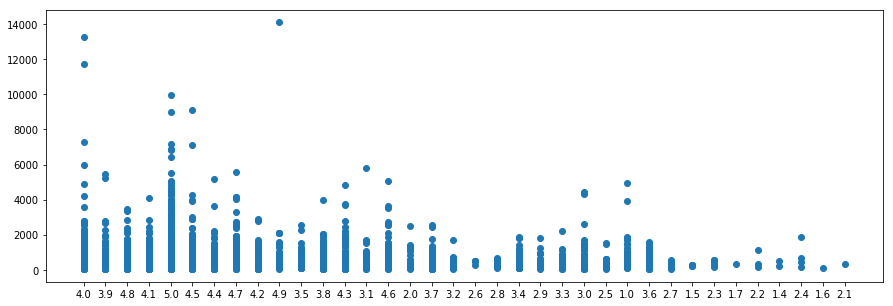

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.scatter(data_train['Reviews'],data_train['Price'])
plt.show()

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

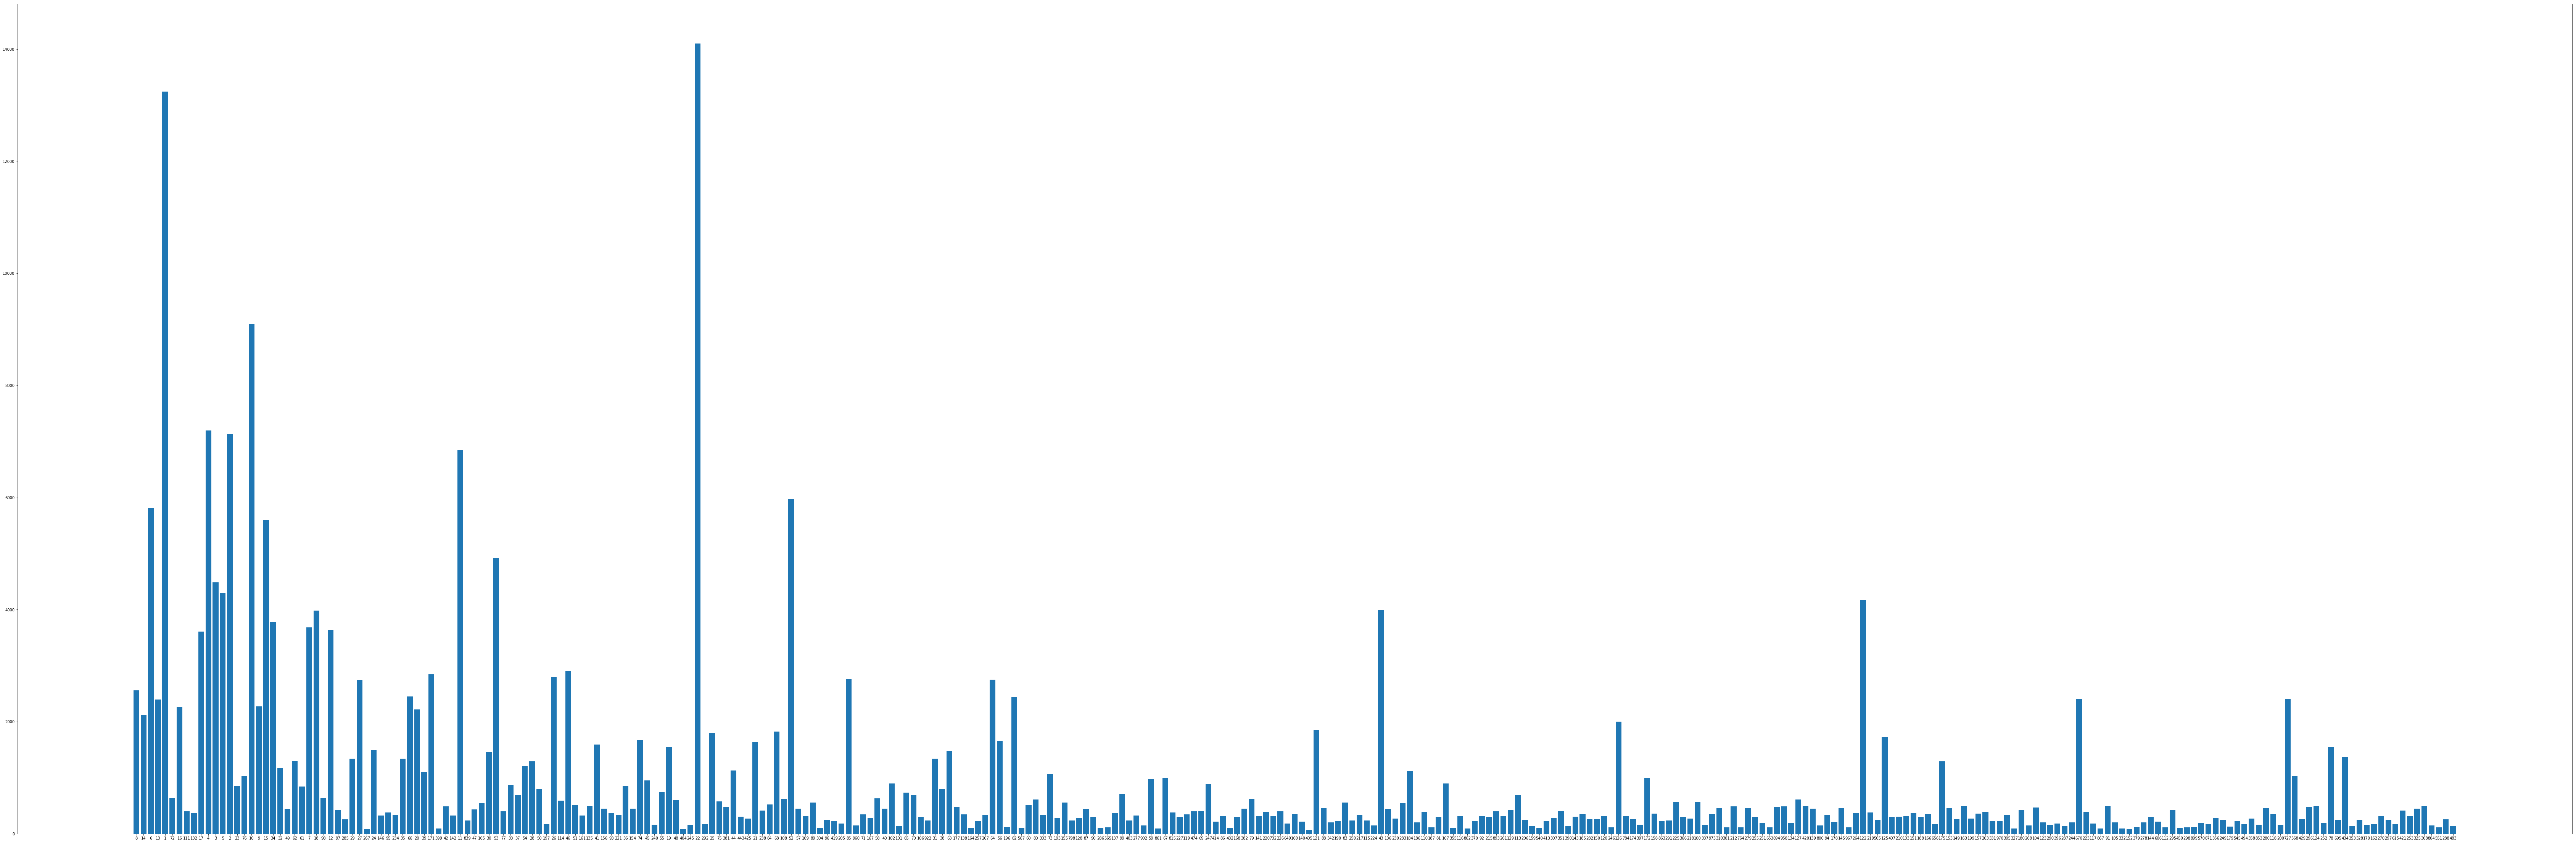

In [146]:
plt.figure(figsize=(120,40))
# data_train.Ratings.value_counts().plot(kind="bar")
plt.bar(data_train.Ratings , data_train.Price)
sns.despine

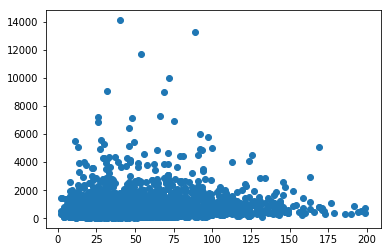

In [147]:
plt.scatter(data_train.title_len , data_train.Price)
plt.show()

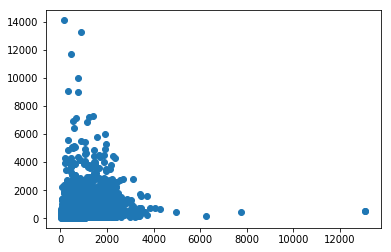

In [148]:
plt.scatter(data_train.synopsis_len , data_train.Price)
plt.show()

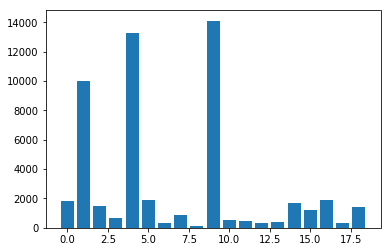

In [149]:
plt.bar(data_train.type , data_train.Price)
plt.show()

In [151]:
data_train.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price', 'type', 'title_len', 'synopsis_len'],
      dtype='object')

In [206]:
#testing 

X = data_train[["Reviews","Ratings","type","title_len","synopsis_len"]].values.astype('float')
Y = data_train[['Price']].values.astype("float")

In [207]:
X

array([[4.000e+00, 8.000e+00, 1.000e+00, 3.500e+01, 7.910e+02],
       [3.900e+00, 1.400e+01, 1.000e+00, 3.400e+01, 1.146e+03],
       [4.800e+00, 6.000e+00, 1.000e+00, 2.800e+01, 1.662e+03],
       ...,
       [3.800e+00, 3.000e+00, 1.000e+00, 5.400e+01, 1.285e+03],
       [3.500e+00, 4.000e+00, 1.000e+00, 2.800e+01, 9.260e+02],
       [3.900e+00, 2.000e+00, 1.000e+00, 2.700e+01, 7.900e+02]])

In [240]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression

In [246]:
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size=0.2)

In [247]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [248]:
model.score(x_test,y_test)

0.05701186627326593

In [263]:
def predict(data):
    import re
    data.Reviews = data.Reviews.apply(lambda x:re.findall(r"[0-5]\.[0-9]",x)[0])
    data.Ratings = data.Ratings.apply(lambda x:re.findall(r"[0-9]+",x)[0])
#     data.Genre = data.Genre.apply(lambda x: re.split(r",|&",re.sub("\((.*?)\)","",x)))
#     data.BookCategory = data.BookCategory.apply(lambda x: re.split(r",|&",x))
    data['type'] = data.Edition.apply(lambda x: x.split(",")[0])
    data['title_len'] = data.Title.apply(lambda x: len(x))
    data['synopsis_len'] = data.Synopsis.apply(lambda x: len(x))
    data.type = data.type.apply(lambda x: types2idx[x])
    
    X = data[["Reviews","Ratings","type","title_len","synopsis_len"]].values.astype('float')
    prediction = model.predict(X)
    return prediction

price_prediction = predict(data_test)

In [265]:
data_test["Price"] = price_prediction

In [271]:
data_test.Price.to_excel("submission.xls", index=None)

In [245]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [213]:
clf.fit(x_train,y_train)

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [214]:
clf.score(x_test,y_test)

0.012537321206059993

In [109]:
test_author = set(data_test.Author)
train_authors = set(data_train.Author)
print(len(train_authors))
len(train_authors.union(test_author))

3679


4372